# Estimation of model patrameters of an AR(3) simulation


In [1]:
# x_t=phi1*x_(t-1)+phi2* x_(t-2)+\phi_3*x_(t-3)+z_t
# z_t~ N(0, sigma^2)

In [2]:
set.seed(2017)
sigma=4
phi=NULL
phi[1:3]=c(1/3,1/2,7/100)
n=100000

## Simulate AR(3) process


In [3]:
ar3.process=arima.sim(n,model=list(ar=c(1/3,1/2, 7/100)), sd=4)

In [4]:
r=NULL
r[1:3]=acf(ar3.process, plot=F)$acf[2:4]
r

[1] 0.7859646 0.8180901 0.7369167

In [5]:
R=matrix(1,3,3) 
R[1,2]=r[1] 
R[1,3]=r[2]
R[2,1]=r[1]
R[2,3]=r[1]
R[3,1]=r[2]
R[3,2]=r[1]
R

1.0000000,0.7859646,0.8180901
0.7859646,1.0000000,0.7859646
0.8180901,0.7859646,1.0000000


In [6]:
# b-column vector on the right
b=matrix(,3,1)# b- column vector with no entries
b[1,1]=r[1]
b[2,1]=r[2]
b[3,1]=r[3]
b

0.7859646
0.8180901
0.7369167


In [7]:
# solve Rx=b and find phi's
phi.hat=solve(R,b)
phi.hat

0.33812448
0.49849991
0.06849712


In [8]:
# sigme estimation
c0=acf(ar3.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 15.979

# Plots

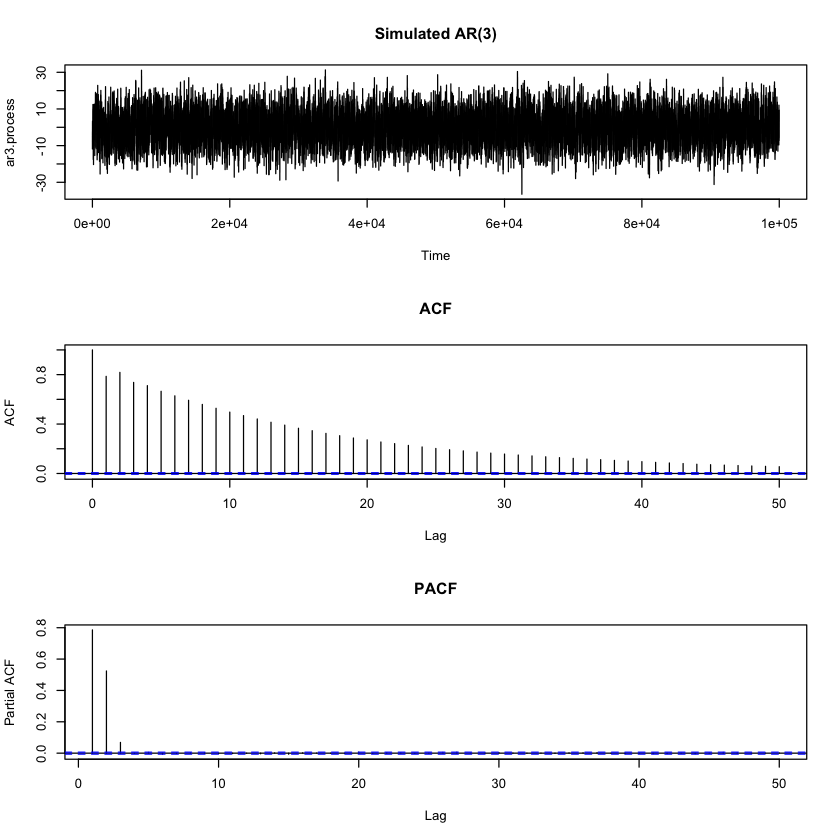

In [9]:
par(mfrow=c(3,1))
plot(ar3.process, main='Simulated AR(3)')
acf(ar3.process, main='ACF')
pacf(ar3.process, main='PACF')